In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import albumentations as A

from torchvision import transforms
from torchvision.transforms import Resize, ToTensor, Normalize

In [2]:
# 테스트 데이터셋 폴더 경로를 지정해주세요.
test_dir = '/opt/ml/input/data/eval'
train_dir = '/opt/ml/input/data/train'

In [3]:
csv_path = os.path.join(train_dir, 'train.csv')
csv = pd.read_csv(csv_path)
image_dir = os.path.join(train_dir, 'images')
pathlist = csv['path']

image_path = []
for p in pathlist:
    images = [os.path.join(*[image_dir, p, image]) for image in os.listdir(os.path.join(image_dir, p)) if not image[:1] == '.']
    for image in images:
        if image.split('/')[-1][0] != 'm':
            image_path.append(image)

In [4]:
total = len(image_path)
tf = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.HueSaturationValue(hue_shift_limit=1, sat_shift_limit=20, val_shift_limit=15, p=0.6),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10, p=0.6),
        A.RandomBrightnessContrast(brightness_limit=0.1, p=0.6),
        A.GaussNoise(p=0.5),
        A.OpticalDistortion(p=0.5),
        A.MotionBlur(p=0.5),
    ])

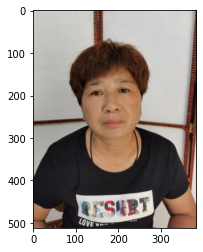

In [5]:
test = image_path[2]
image = cv2.imread(test)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

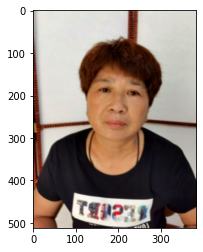

In [6]:
plt.imshow(tf(image=image)['image'])

In [7]:
for num, path in enumerate(image_path):
    print(num + 1, '/', total)
    # plt.imshow(image)
    for i in range(2,6):
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        splitted = path.split('.')
        filename = splitted[0] + str(i) + '.' + splitted[1]
        image_after = tf(image=image)['image']
        image_after = cv2.cvtColor(image_after, cv2.COLOR_RGB2BGR)
        cv2.imwrite(filename, image_after)

1 / 5400
2 / 5400
3 / 5400
4 / 5400
5 / 5400
6 / 5400
7 / 5400
8 / 5400
9 / 5400
10 / 5400
11 / 5400
12 / 5400
13 / 5400
14 / 5400
15 / 5400
16 / 5400
17 / 5400
18 / 5400
19 / 5400
20 / 5400
21 / 5400
22 / 5400
23 / 5400
24 / 5400
25 / 5400
26 / 5400
27 / 5400
28 / 5400
29 / 5400
30 / 5400
31 / 5400
32 / 5400
33 / 5400
34 / 5400
35 / 5400
36 / 5400
37 / 5400
38 / 5400
39 / 5400
40 / 5400
41 / 5400
42 / 5400
43 / 5400
44 / 5400
45 / 5400
46 / 5400
47 / 5400
48 / 5400
49 / 5400
50 / 5400
51 / 5400
52 / 5400
53 / 5400
54 / 5400
55 / 5400
56 / 5400
57 / 5400
58 / 5400
59 / 5400
60 / 5400
61 / 5400
62 / 5400
63 / 5400
64 / 5400
65 / 5400
66 / 5400
67 / 5400
68 / 5400
69 / 5400
70 / 5400
71 / 5400
72 / 5400
73 / 5400
74 / 5400
75 / 5400
76 / 5400
77 / 5400
78 / 5400
79 / 5400
80 / 5400
81 / 5400
82 / 5400
83 / 5400
84 / 5400
85 / 5400
86 / 5400
87 / 5400
88 / 5400
89 / 5400
90 / 5400
91 / 5400
92 / 5400
93 / 5400
94 / 5400
95 / 5400
96 / 5400
97 / 5400
98 / 5400
99 / 5400
100 / 5400
101 / 54